# Credit Card Fraud Detection

#### Importing the libraries

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier  
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer

#### Importing the training dataset

In [58]:
training_set = pd.read_csv('fraudTrain.csv')
training_set.head(10)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0
5,5,2019-01-01 00:04:08,4767265376804500,"fraud_Stroman, Hudson and Erdman",gas_transport,94.63,Jennifer,Conner,F,4655 David Island,...,40.3750,-75.2045,2158,Transport planner,1961-06-19,189a841a0a8ba03058526bcfe566aab5,1325376248,40.653382,-76.152667,0
6,6,2019-01-01 00:04:42,30074693890476,fraud_Rowe-Vandervort,grocery_net,44.54,Kelsey,Richards,F,889 Sarah Station Suite 624,...,37.9931,-100.9893,2691,Arboriculturist,1993-08-16,83ec1cc84142af6e2acf10c44949e720,1325376282,37.162705,-100.153370,0
7,7,2019-01-01 00:05:08,6011360759745864,fraud_Corwin-Collins,gas_transport,71.65,Steven,Williams,M,231 Flores Pass Suite 720,...,38.8432,-78.6003,6018,"Designer, multimedia",1947-08-21,6d294ed2cc447d2c71c7171a3d54967c,1325376308,38.948089,-78.540296,0
8,8,2019-01-01 00:05:18,4922710831011201,fraud_Herzog Ltd,misc_pos,4.27,Heather,Chase,F,6888 Hicks Stream Suite 954,...,40.3359,-79.6607,1472,Public affairs consultant,1941-03-07,fc28024ce480f8ef21a32d64c93a29f5,1325376318,40.351813,-79.958146,0
9,9,2019-01-01 00:06:01,2720830304681674,"fraud_Schoen, Kuphal and Nitzsche",grocery_pos,198.39,Melissa,Aguilar,F,21326 Taylor Squares Suite 708,...,36.5220,-87.3490,151785,Pathologist,1974-03-28,3b9014ea8fb80bd65de0b1463b00b00e,1325376361,37.179198,-87.485381,0


#### Importing the test set

In [59]:
test_set = pd.read_csv('fraudTest.csv')
test_set.head(10)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0
5,5,2020-06-21 12:15:37,30407675418785,fraud_Daugherty LLC,kids_pets,19.55,Danielle,Evans,F,76752 David Lodge Apt. 064,...,42.1939,-76.7361,520,Psychotherapist,1991-10-13,798db04aaceb4febd084f1a7c404da93,1371816937,41.747157,-77.584197,0
6,6,2020-06-21 12:15:44,213180742685905,fraud_Romaguera Ltd,health_fitness,133.93,Kayla,Sutton,F,010 Weaver Land,...,40.5070,-123.9743,1139,"Therapist, occupational",1951-01-15,17003d7ce534440eadb10c4750e020e5,1371816944,41.499458,-124.888729,0
7,7,2020-06-21 12:15:50,3589289942931264,fraud_Reichel LLC,personal_care,10.37,Paula,Estrada,F,350 Stacy Glens,...,43.7557,-97.5936,343,"Development worker, international aid",1972-03-05,8be473af4f05fc6146ea55ace73e7ca2,1371816950,44.495498,-97.728453,0
8,8,2020-06-21 12:16:10,3596357274378601,"fraud_Goyette, Howell and Collier",shopping_pos,4.37,David,Everett,M,4138 David Fall,...,41.0001,-78.2357,3688,Advice worker,1973-05-27,71a1da150d1ce510193d7622e08e784e,1371816970,41.546067,-78.120238,0
9,9,2020-06-21 12:16:11,3546897637165774,fraud_Kilback Group,food_dining,66.54,Kayla,Obrien,F,7921 Robert Port Suite 343,...,31.6591,-96.8094,263,Barrister,1956-05-30,a7915132c7c4240996ba03a47f81e3bd,1371816971,31.782919,-96.366185,0


In [60]:
training_set.drop(columns=['trans_date_trans_time','first','last','street','city','state','dob','trans_num'], inplace=True)
training_set

,Unnamed: 0,cc_num,merchant,category,amt,gender,zip,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud
0,0,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1325376018,36.011293,-82.048315,0
1,1,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,99160,48.8878,-118.2105,149,Special educational needs teacher,1325376044,49.159047,-118.186462,0
2,2,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,M,83252,42.1808,-112.2620,4154,Nature conservation officer,1325376051,43.150704,-112.154481,0
3,3,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,59632,46.2306,-112.1138,1939,Patent attorney,1325376076,47.034331,-112.561071,0
4,4,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,M,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,1296670,30263540414123,fraud_Reichel Inc,entertainment,15.56,M,84735,37.7175,-112.4777,258,Geoscientist,1371816728,36.841266,-111.690765,0
1296671,1296671,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,M,21790,39.2667,-77.5101,100,"Production assistant, television",1371816739,38.906881,-78.246528,0
1296672,1296672,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,M,88325,32.9396,-105.8189,899,Naval architect,1371816752,33.619513,-105.130529,0
1296673,1296673,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,M,57756,43.3526,-102.5411,1126,Volunteer coordinator,1371816816,42.788940,-103.241160,0


In [61]:
training_set.drop(training_set.columns[0], axis=1, inplace=True)

In [62]:
training_set

,cc_num,merchant,category,amt,gender,zip,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud
0,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1325376018,36.011293,-82.048315,0
1,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,99160,48.8878,-118.2105,149,Special educational needs teacher,1325376044,49.159047,-118.186462,0
2,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,M,83252,42.1808,-112.2620,4154,Nature conservation officer,1325376051,43.150704,-112.154481,0
3,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,59632,46.2306,-112.1138,1939,Patent attorney,1325376076,47.034331,-112.561071,0
4,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,M,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,30263540414123,fraud_Reichel Inc,entertainment,15.56,M,84735,37.7175,-112.4777,258,Geoscientist,1371816728,36.841266,-111.690765,0
1296671,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,M,21790,39.2667,-77.5101,100,"Production assistant, television",1371816739,38.906881,-78.246528,0
1296672,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,M,88325,32.9396,-105.8189,899,Naval architect,1371816752,33.619513,-105.130529,0
1296673,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,M,57756,43.3526,-102.5411,1126,Volunteer coordinator,1371816816,42.788940,-103.241160,0


#### Encoding the Categorical Variables

In [63]:
encoder=LabelEncoder()
def encode(data):
    data['merchant']=encoder.fit_transform(data['merchant'])
    data["category"] = encoder.fit_transform(data["category"])
    data["gender"] = encoder.fit_transform(data["gender"])
    data["job"] = encoder.fit_transform(data["job"])
    return data

In [64]:
encode(training_set)

,cc_num,merchant,category,amt,gender,zip,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud
0,2703186189652095,514,8,4.97,0,28654,36.0788,-81.1781,3495,370,1325376018,36.011293,-82.048315,0
1,630423337322,241,4,107.23,0,99160,48.8878,-118.2105,149,428,1325376044,49.159047,-118.186462,0
2,38859492057661,390,0,220.11,1,83252,42.1808,-112.2620,4154,307,1325376051,43.150704,-112.154481,0
3,3534093764340240,360,2,45.00,1,59632,46.2306,-112.1138,1939,328,1325376076,47.034331,-112.561071,0
4,375534208663984,297,9,41.96,1,24433,38.4207,-79.4629,99,116,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,30263540414123,499,0,15.56,1,84735,37.7175,-112.4777,258,215,1371816728,36.841266,-111.690765,0
1296671,6011149206456997,2,1,51.70,1,21790,39.2667,-77.5101,100,360,1371816739,38.906881,-78.246528,0
1296672,3514865930894695,599,1,105.93,1,88325,32.9396,-105.8189,899,308,1371816752,33.619513,-105.130529,0
1296673,2720012583106919,509,1,74.90,1,57756,43.3526,-102.5411,1126,485,1371816816,42.788940,-103.241160,0


In [65]:
training_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 14 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   cc_num      1296675 non-null  int64  
 1   merchant    1296675 non-null  int32  
 2   category    1296675 non-null  int32  
 3   amt         1296675 non-null  float64
 4   gender      1296675 non-null  int32  
 5   zip         1296675 non-null  int64  
 6   lat         1296675 non-null  float64
 7   long        1296675 non-null  float64
 8   city_pop    1296675 non-null  int64  
 9   job         1296675 non-null  int32  
 10  unix_time   1296675 non-null  int64  
 11  merch_lat   1296675 non-null  float64
 12  merch_long  1296675 non-null  float64
 13  is_fraud    1296675 non-null  int64  
dtypes: float64(5), int32(4), int64(5)
memory usage: 118.7 MB


In [66]:
missing_value=training_set.isnull().sum()
pd.DataFrame({'missing_value':missing_value})

,missing_value
cc_num,0
merchant,0
category,0
amt,0
gender,0
zip,0
lat,0
long,0
city_pop,0
job,0


In [67]:
classes=training_set['is_fraud'].value_counts()
print(f'normal ={classes[0]}')
print(f'fraud ={classes[1]}')


normal =1289169
fraud =7506


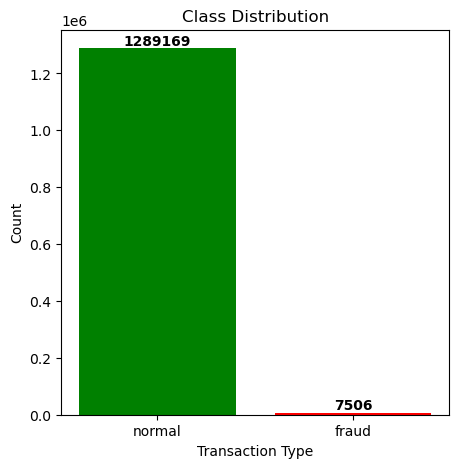

In [68]:
title=['normal','fraud']
value=[classes[0],classes[1]]
plt.figure(figsize=(5, 5))
bars = plt.bar(title, value, color=['green','red'])
for bar in bars:
    yval = bar.get_height()  
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 20,  
             str(int(yval)),  
             ha='center', va='bottom', fontweight='bold') 
plt.title('Class Distribution')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.show()

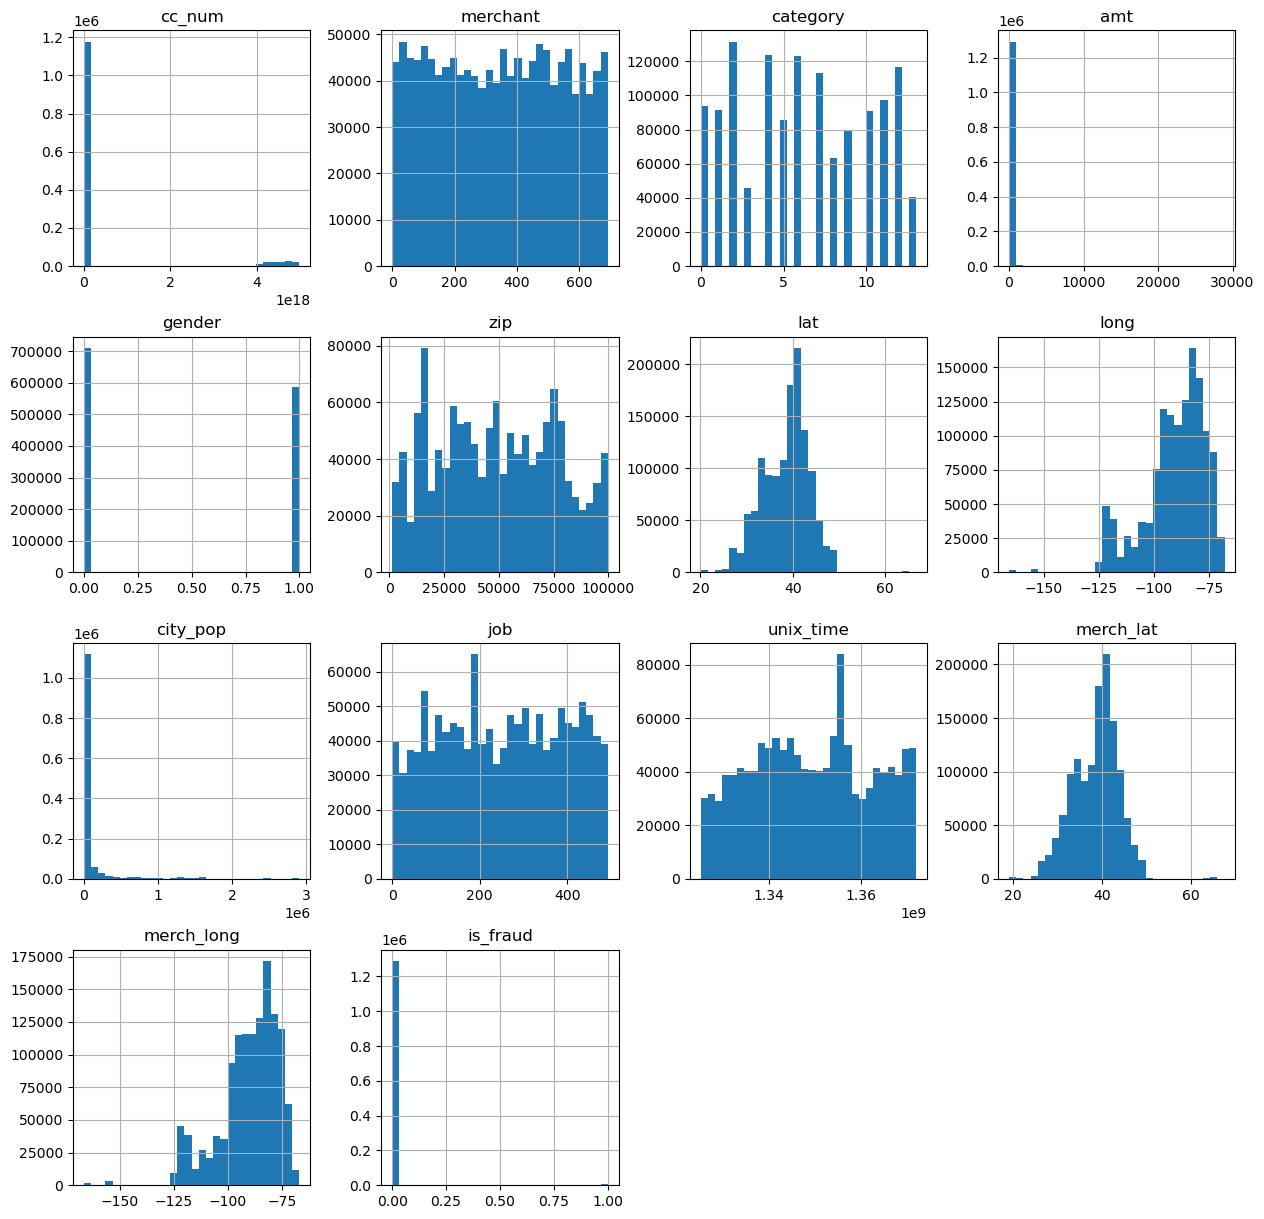

In [69]:
training_set.hist(bins=30, figsize=(15,15))
plt.show()

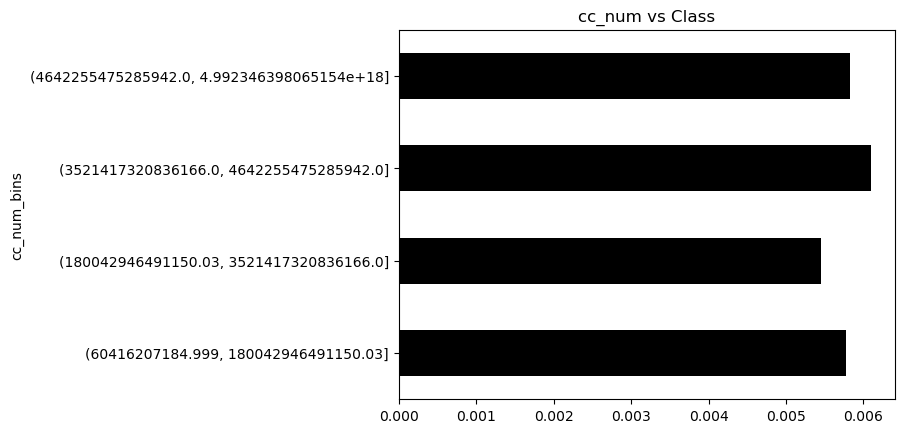

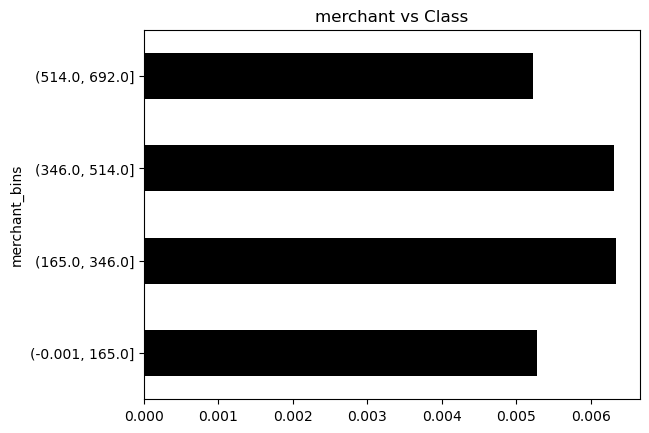

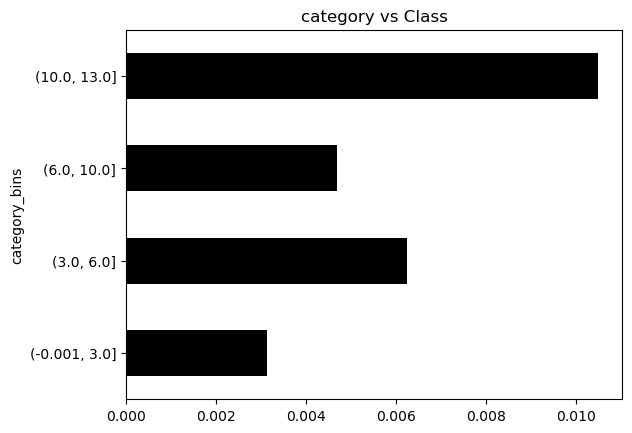

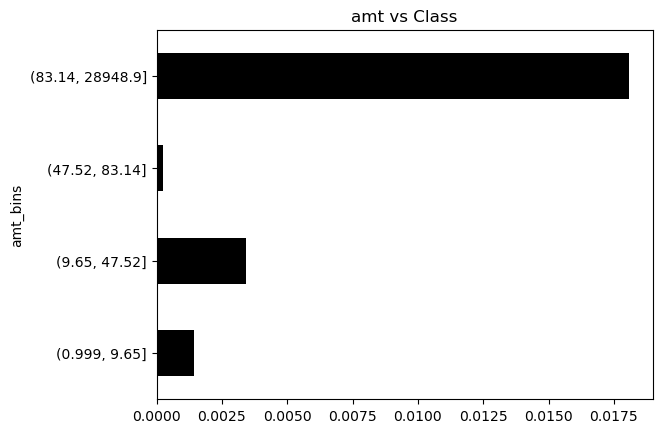

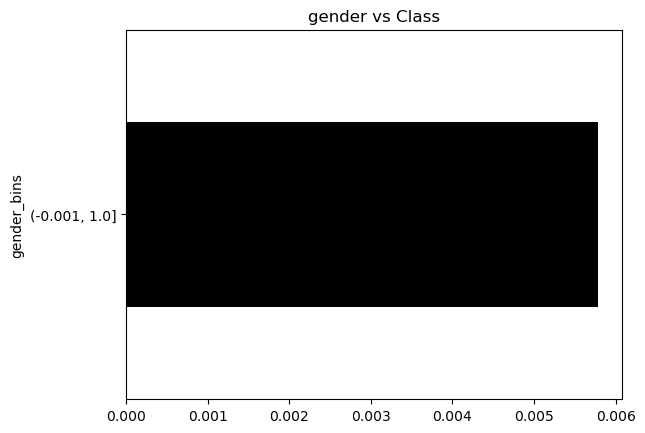

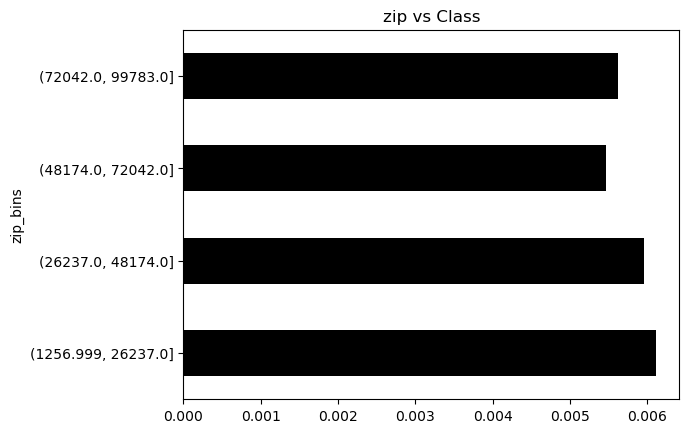

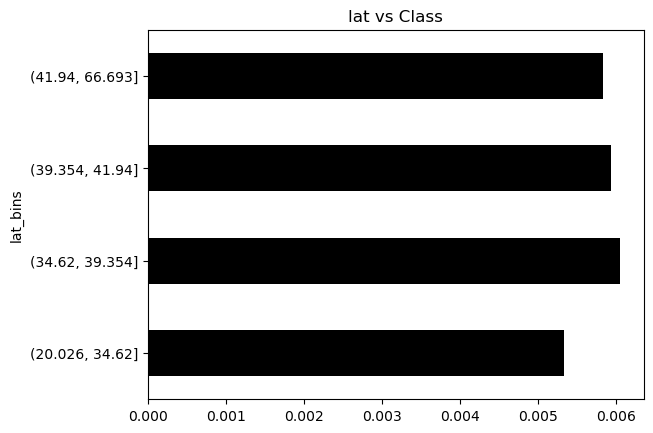

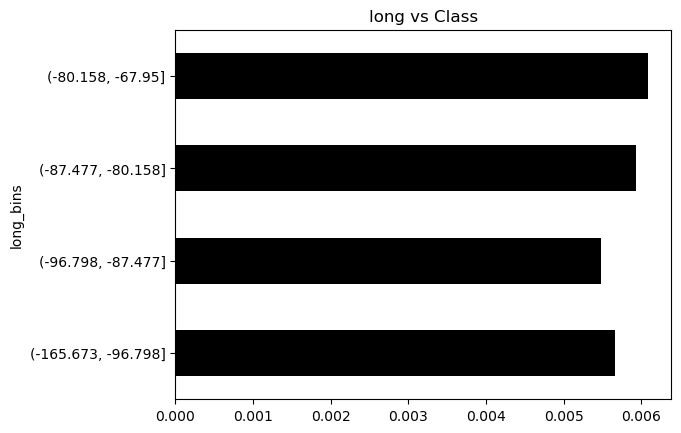

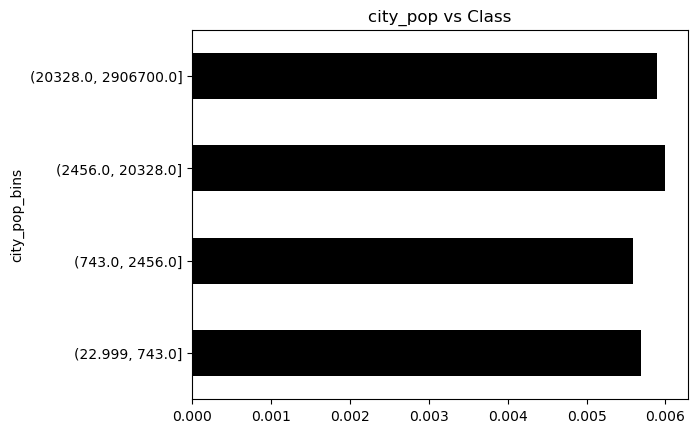

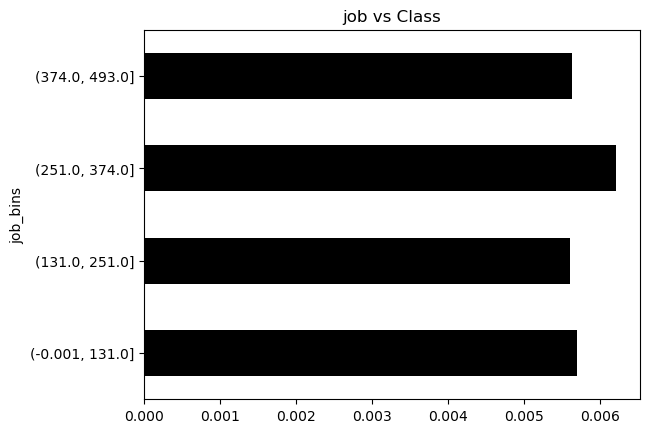

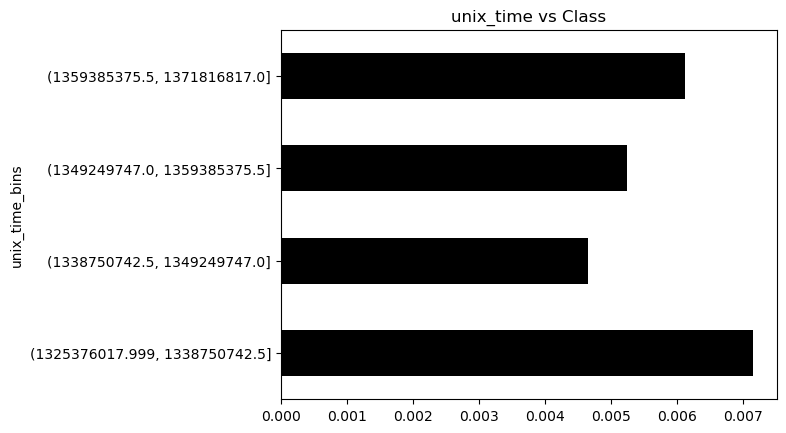

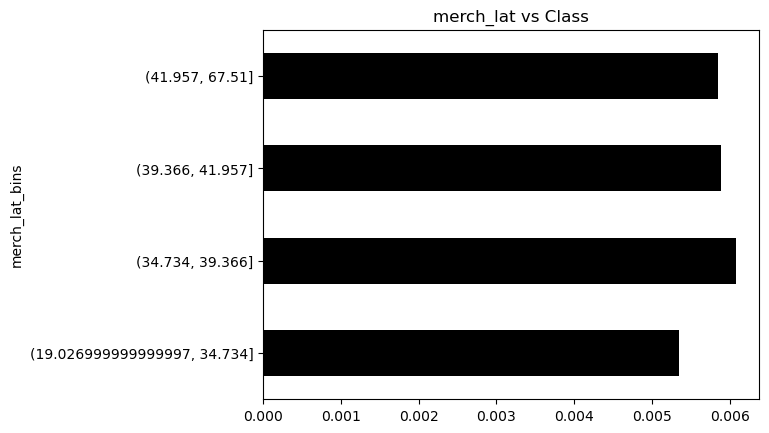

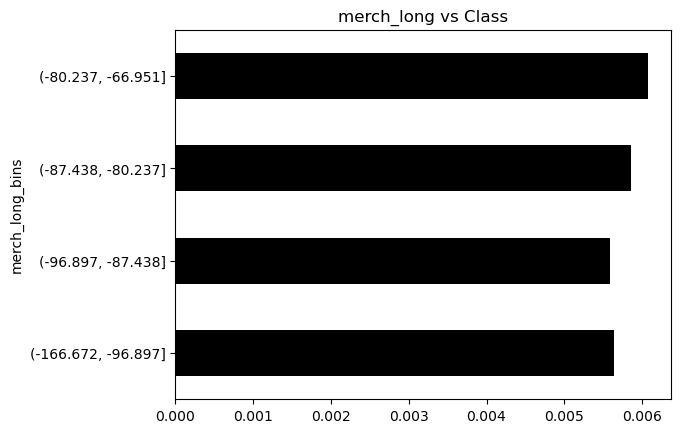

In [70]:
for i in training_set.columns[:-1]:  
    tmp = training_set.copy()  
    
    # Discretize the feature into 4 bins (quartiles)
    tmp[f'{i}_bins'] = pd.qcut(training_set[i], q=4, duplicates='drop')  

    # Compute mean Class value for each bin
    stats = tmp.groupby(f'{i}_bins')['is_fraud'].mean() ## Greater the bars, more is the chance of fraud 

    # Plot
    stats.plot(kind="barh", title=f"{i} vs Class", color='black')
    plt.show()

In [71]:
X = training_set.iloc[:, :-1].values
y = training_set.iloc[:, -1].values

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

#### Normalising the data

In [73]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)

In [74]:
X_test = sc.transform(X_test)

#### Applying Random Forest Classification

In [75]:
rf = RandomForestClassifier(n_estimators=30, max_depth=30, max_samples=0.2, bootstrap=True, random_state=42)
rf.fit(X_train, y_train)

y_predict = rf.predict(X_test)
y_pred_prob = rf.predict_proba(X_test)  # Get probability scores

accuracy = accuracy_score(y_test, y_predict)
roc_auc = roc_auc_score(y_test, y_pred_prob[:, 1])
print("Accuracy:", accuracy)
print("ROC AUC Score:", roc_auc)

Accuracy: 0.9968935956245045
ROC AUC Score: 0.9598222521812724


In [76]:
test_set.drop(columns=['trans_date_trans_time','first','last','street','city','state','dob','trans_num'], inplace=True)
test_set

,Unnamed: 0,cc_num,merchant,category,amt,gender,zip,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud
0,0,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,M,29209,33.9659,-80.9355,333497,Mechanical engineer,1371816865,33.986391,-81.200714,0
1,1,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,F,84002,40.3207,-110.4360,302,"Sales professional, IT",1371816873,39.450498,-109.960431,0
2,2,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,F,11710,40.6729,-73.5365,34496,"Librarian, public",1371816893,40.495810,-74.196111,0
3,3,3591919803438423,fraud_Haley Group,misc_pos,60.05,M,32780,28.5697,-80.8191,54767,Set designer,1371816915,28.812398,-80.883061,0
4,4,3526826139003047,fraud_Johnston-Casper,travel,3.19,M,49632,44.2529,-85.0170,1126,Furniture designer,1371816917,44.959148,-85.884734,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,555714,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,M,63453,40.4931,-91.8912,519,Town planner,1388534347,39.946837,-91.333331,0
555715,555715,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,M,77566,29.0393,-95.4401,28739,Futures trader,1388534349,29.661049,-96.186633,0
555716,555716,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,F,99323,46.1966,-118.9017,3684,Musician,1388534355,46.658340,-119.715054,0
555717,555717,4079773899158,fraud_Breitenberg LLC,travel,7.99,M,83643,44.6255,-116.4493,129,Cartographer,1388534364,44.470525,-117.080888,0


In [77]:
test_set.drop(test_set.columns[0], axis=1, inplace=True)

In [78]:
test_set

,cc_num,merchant,category,amt,gender,zip,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud
0,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,M,29209,33.9659,-80.9355,333497,Mechanical engineer,1371816865,33.986391,-81.200714,0
1,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,F,84002,40.3207,-110.4360,302,"Sales professional, IT",1371816873,39.450498,-109.960431,0
2,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,F,11710,40.6729,-73.5365,34496,"Librarian, public",1371816893,40.495810,-74.196111,0
3,3591919803438423,fraud_Haley Group,misc_pos,60.05,M,32780,28.5697,-80.8191,54767,Set designer,1371816915,28.812398,-80.883061,0
4,3526826139003047,fraud_Johnston-Casper,travel,3.19,M,49632,44.2529,-85.0170,1126,Furniture designer,1371816917,44.959148,-85.884734,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,M,63453,40.4931,-91.8912,519,Town planner,1388534347,39.946837,-91.333331,0
555715,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,M,77566,29.0393,-95.4401,28739,Futures trader,1388534349,29.661049,-96.186633,0
555716,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,F,99323,46.1966,-118.9017,3684,Musician,1388534355,46.658340,-119.715054,0
555717,4079773899158,fraud_Breitenberg LLC,travel,7.99,M,83643,44.6255,-116.4493,129,Cartographer,1388534364,44.470525,-117.080888,0


In [79]:
encode(test_set)

,cc_num,merchant,category,amt,gender,zip,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud
0,2291163933867244,319,10,2.86,1,29209,33.9659,-80.9355,333497,275,1371816865,33.986391,-81.200714,0
1,3573030041201292,591,10,29.84,0,84002,40.3207,-110.4360,302,392,1371816873,39.450498,-109.960431,0
2,3598215285024754,611,5,41.28,0,11710,40.6729,-73.5365,34496,259,1371816893,40.495810,-74.196111,0
3,3591919803438423,222,9,60.05,1,32780,28.5697,-80.8191,54767,407,1371816915,28.812398,-80.883061,0
4,3526826139003047,292,13,3.19,1,49632,44.2529,-85.0170,1126,196,1371816917,44.959148,-85.884734,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,30560609640617,507,5,43.77,1,63453,40.4931,-91.8912,519,460,1388534347,39.946837,-91.333331,0
555715,3556613125071656,264,7,111.84,1,77566,29.0393,-95.4401,28739,198,1388534349,29.661049,-96.186633,0
555716,6011724471098086,496,7,86.88,0,99323,46.1966,-118.9017,3684,294,1388534355,46.658340,-119.715054,0
555717,4079773899158,75,13,7.99,1,83643,44.6255,-116.4493,129,58,1388534364,44.470525,-117.080888,0


#### Testing the model on the Test set data

In [80]:
X_new = test_set.iloc[:, :-1].values
y_new = test_set.iloc[:, -1].values

In [82]:
X_new = sc.fit_transform(X_new)

In [ ]:
y_predict = rf.predict(X_new)
y_pred_prob = rf.predict_proba(X_new)  # Get probability scores

accuracy = accuracy_score(y_new, y_predict)
roc_auc = roc_auc_score(y_new, y_pred_prob[:, 1])
print("Accuracy:", accuracy)
print("ROC AUC Score:", roc_auc)

Accuracy: 0.9973925671067572
ROC AUC Score: 0.9292447244889016
